### Feature Engineering Example

But why work with returns when we already have the prices?  
The reason is that prices are usually non-stationary, that is when statistics such as mean and variance (mathematical moments) change over time.

In [ ]:
# create simple and log returns, multiplied by 100 for convenience
df['simple_rtn'] = 100 * df.adj_close.pct_change()
df['log_rtn'] = 100 * (np.log(df.adj_close) - np.log(df.adj_close.shift(1)))

### Importance of Data/Feature Engineering  

Different types of data for different ml algos  
* Decision Trees: split at threshold of feature, createing multiple nested 'if' statements as rules
* Neural Network: adjusts weights fo feature and combination of features, creating a matrix for predictions  

Normalize, Scale and Center Data  
* Normalize: take from absolute to relative values  
        * The opening price was $20 below yesterday's closing price (not normalized)  
        Most of time use Mean: 0 and Variance: 1  
        Other times want the variables bound between 0 and 1  
        * The opening price was 2% bellow yesterday's closing price (normalized)  
* Scale: adjust distribution/range of feature to a standard size (needed for NNets not DTrees)
        * Can use quantiles to more robustly account for outliers
* Center: adjust mean of feature to 0 (needed for NNets, not DTrees)  
* Feature Engineering: NNets can engineer features (combine weights from different features), DTrees cannot create new features, just organize different rules based on sets of features(features dependent on each others

### Plotly Candlestick Example

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'AZ Avg Time Away'], name='AZ Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'CO Avg Time Away'], name='CO Avg Time Away', line=dict(width=4)))
fig.add_trace(go.Scatter(x=outside_view.date, y=outside_view.loc[:,'NAT Avg Time Away'], name='NAT Avg Time Away', line=dict(width=4)))

fig.add_trace(go.Scatter(x=cov_az.date, y=(cov_az.loc[:,'new_case_rate']/500), name='AZ New Covid Case Rate', line=dict(dash='dash', color='blue')))
fig.add_trace(go.Scatter(x=cov_co.date, y=(cov_co.loc[:,'new_case_rate']/500), name='CO New Covid Case Rate', line=dict(dash='dash', color='red')))
fig.add_trace(go.Scatter(x=cov_nat.date, y=(cov_nat.loc[:,'new_case_rate']/500), name='NAT New Covid Case Rate', line=dict(dash='dash', color='green')))
#fig = px.line(covid_co, x='date', y=['new_case_count','death_count'])

fig.update_layout(
        title='Change in Time Outside Home vs New Covid Case Rate',
        xaxis=dict(showline=True, showgrid=False, showticklabels=True), 
        xaxis_title='Date',
        yaxis_title='% Change Relative to January 2020',
        plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Time Outside Home')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.bar(ui_pua_view, x='date', y=Pan_Unemploy_Assist, title='Pandemic Unemployment Assistance')
fig.update_xaxes(title_text='Date', nticks=16)
fig.update_yaxes(title_text='Initial Claims')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.area(consum_spend_view, x='date', y=['AZ Consumer Spending', 'CO Consumer Spending', 'National Consumer Spending'], title='Spending Differences After Covid (A.C.)', width=1400, height=500)

fig.update_xaxes(title_text='Date') #labels={'x': 'Date', 'y':'Year Over Year Spending Difference'}
fig.update_yaxes(title_text='Year Over Year Spending Difference')
fig.update_layout(plot_bgcolor='white')
fig.show()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Middle Band'], line=dict(color='blue', width=0.7), name='Middle Band'))
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], line=dict(color='red', width=1.5), name='Upper Band (Sell)'))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], line=dict(color='green', width=1.5), name='Lower Band (Buy)'))

fig.add_trace(go.Candlestick(x=df.index,
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='market data'))

fig.update_layout(title='Bollinger Band Strategy', yaxis_title='Jacobs Engineering Stock Price (USD per Shares)')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                        buttons=list([
                                dict(count=1, label='1m', step='month', stepmode='backward'),
                                dict(count=6, label='6m', step='month', stepmode='backward'),
                                dict(count=1, label='YTD', step='year', stepmode='todate'),
                                dict(count=1, label='1y', step='year', stepmode='backward'),
                                dict(step='all')
                                    ])
                                    )
                )

fig.show()

# Imports

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import investpy as ipy
import datetime as dt
import requests
from project_functions import test_stationarity, decomposition_components, timestep_creator
import plotly.io as pio
pio.templates

import plotly as py
import plotly.io as pio
pio.templates
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected=True)

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout

Need these Metrics  

Time Series Split Cross-Validation  
    Blocked Cross-Validation  
    Grid Search Cross-Validation  
    R2 Loss Function  
    Elastic Net Regression

In [2]:
today = dt.date.today()

# dd/mm/YY
today_proper = today.strftime("%d/%m/%Y")

data = ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2010', to_date='31/05/2020')
holdout_data =  ipy.get_crypto_historical_data(crypto='bitcoin', from_date='01/06/2021', to_date=today_proper)

# EDA

In [3]:
data.head()

Open  High  Low  Close  Volume Currency
Date                                               
2010-07-18   0.0   0.1  0.1    0.1      75      USD
2010-07-19   0.1   0.1  0.1    0.1     574      USD
2010-07-20   0.1   0.1  0.1    0.1     262      USD
2010-07-21   0.1   0.1  0.1    0.1     575      USD
2010-07-22   0.1   0.1  0.1    0.1    2160      USD

In [4]:
dataframe = pd.DataFrame(data['Close'])
dataframe['Simple Return'] = 100 * dataframe.Close.pct_change()
dataframe['Log Return'] = (np.log(dataframe.Close) - np.log(dataframe.Close.shift(1)))

In [5]:
# Checking for null values
dataframe.isna().any()

Close            False
Simple Return     True
Log Return        True
dtype: bool

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3606 entries, 2010-07-18 to 2020-05-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          3606 non-null   float64
 1   Simple Return  3605 non-null   float64
 2   Log Return     3605 non-null   float64
dtypes: float64(3)
memory usage: 112.7 KB


# Time Series Analysis

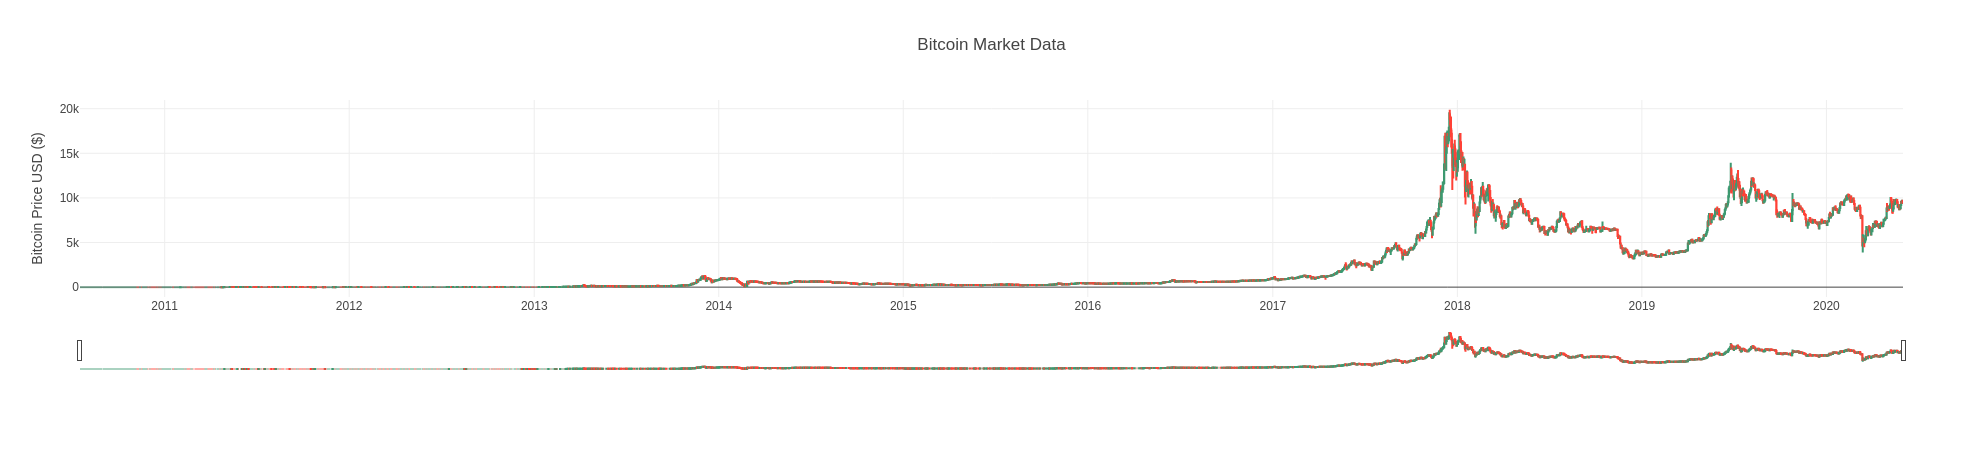

In [7]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=data.index, open=data['Open'], high=data['High'], low=data['Low'], close=data['Close'], name='Bitcoin Market Data'))

fig.update_layout(title='Bitcoin Market Data', yaxis_title='Bitcoin Price USD ($)', template='none')

fig.show()

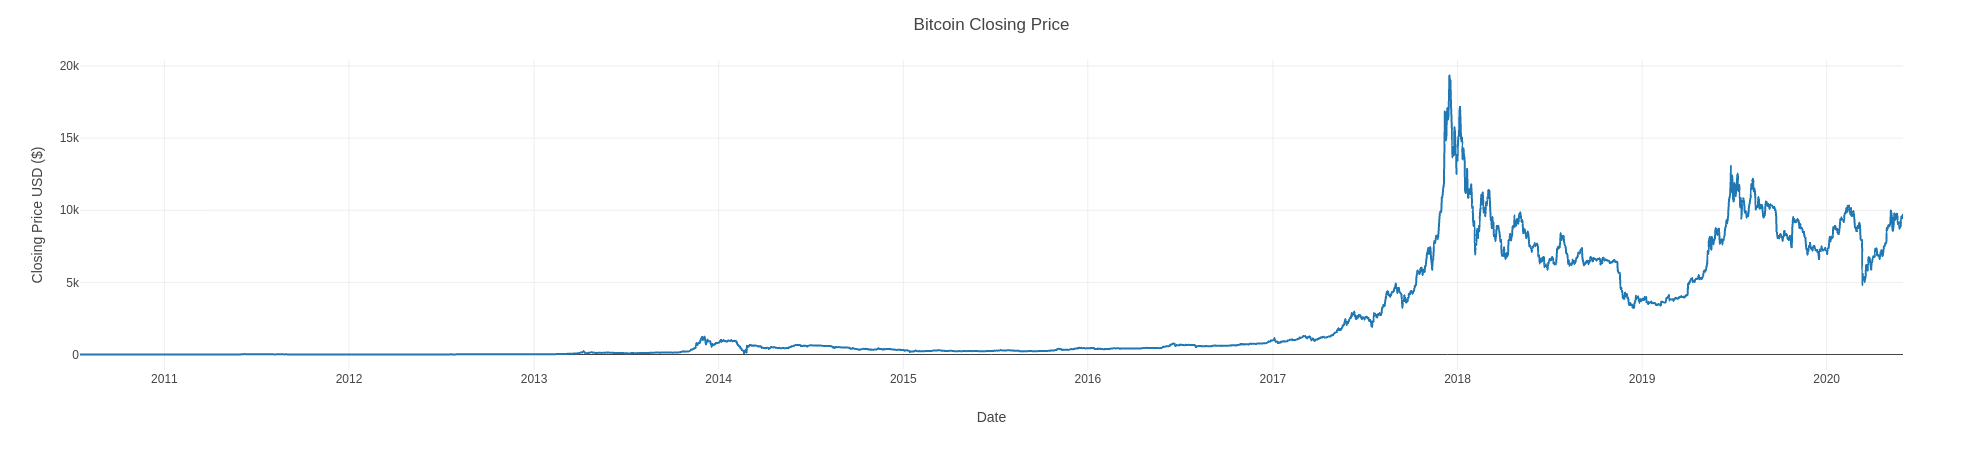

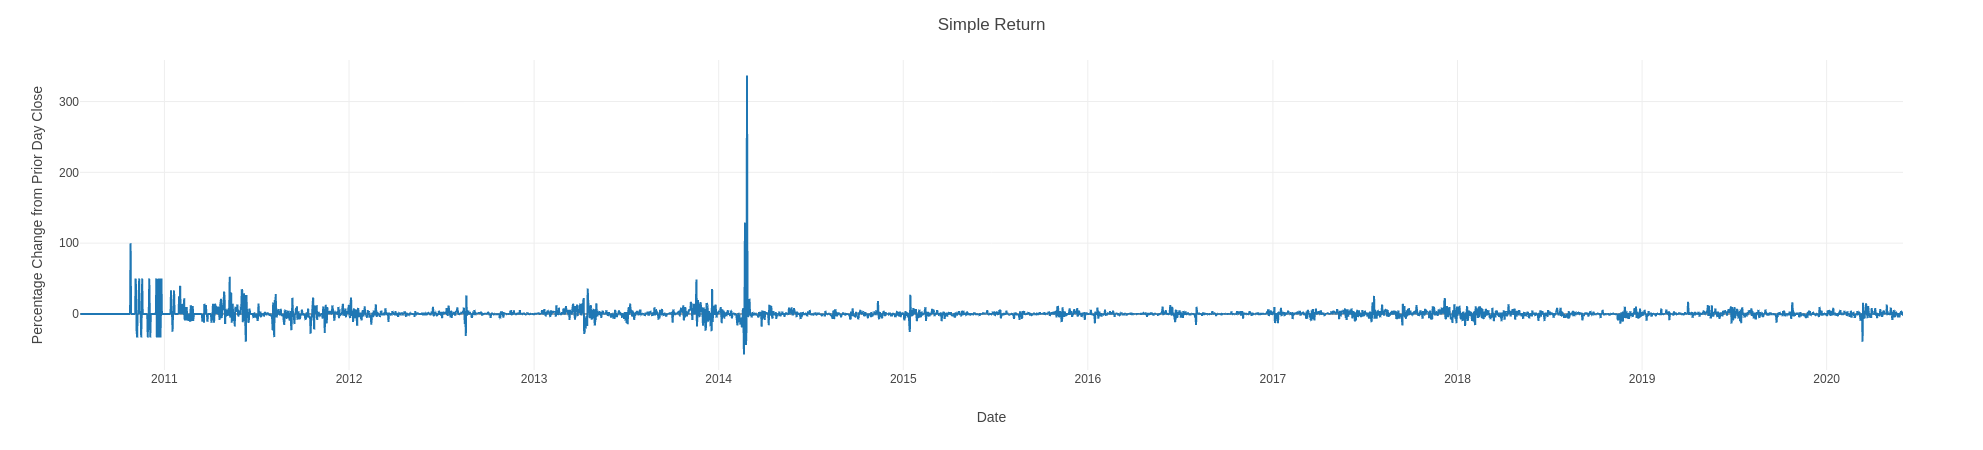

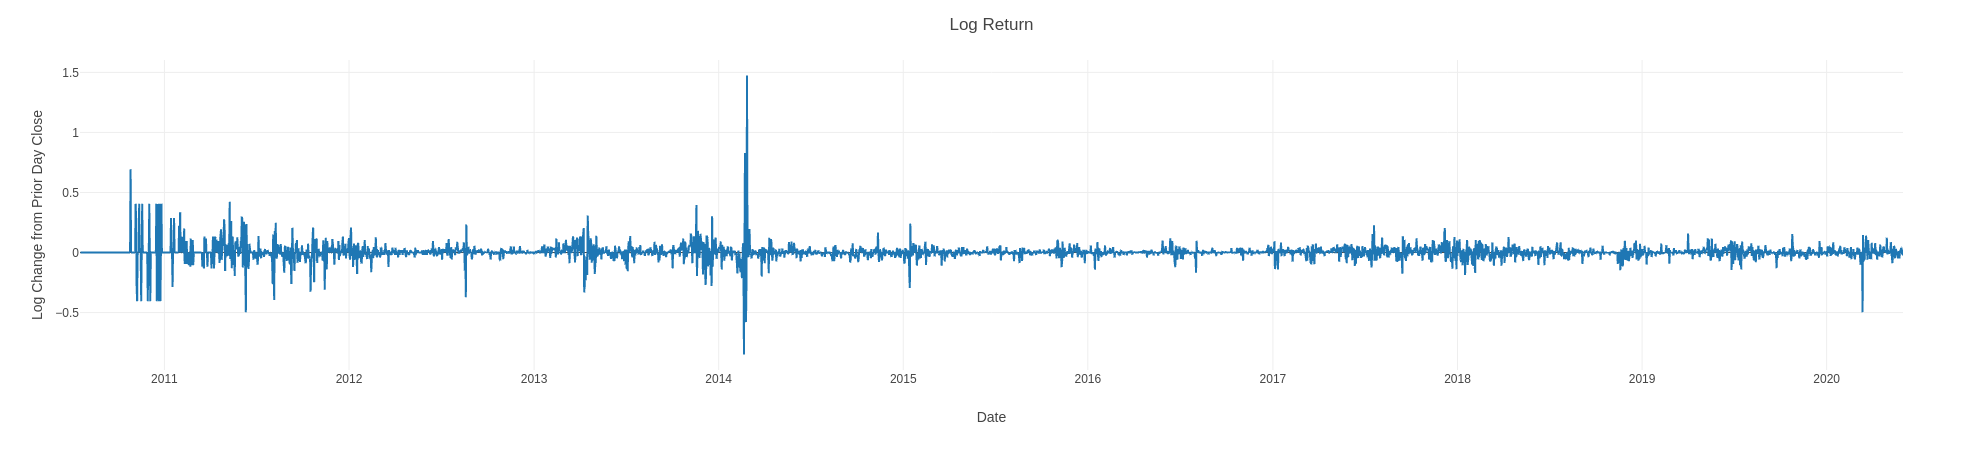

In [8]:
for column in dataframe.columns:
    
    titles = {
        'Close': 'Bitcoin Closing Price',
        'Simple Return': 'Simple Return',
        'Log Return': 'Log Return'
    }
    
    yaxis_titles = {
        'Close': 'Closing Price USD ($)',
        'Simple Return': 'Percentage Change from Prior Day Close',
        'Log Return': 'Log Change from Prior Day Close'
    }
   
    fig = px.line(dataframe, x=dataframe.index, y=dataframe[column], template='none')
    fig.update_yaxes(title_text=yaxis_titles[column])
    fig.update_layout(title=titles[column])
    
    fig.show()

A logarithmic, or log, scale gives equal visual weight to equal relative changes: a 10% move looks the same whether it is from a high or a low base. The result is that the magnitudes of earlier and later booms and busts can be compared on a level playing field.  

Additionally, a series experiencing exponential growth appears as straight lines, making charts easier to interpret. With a logarithmic scale a constant percentage change is seen as a constant vertical distance so a constant growth rate is seen as a straight line.  

/home/bobbyhuck/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




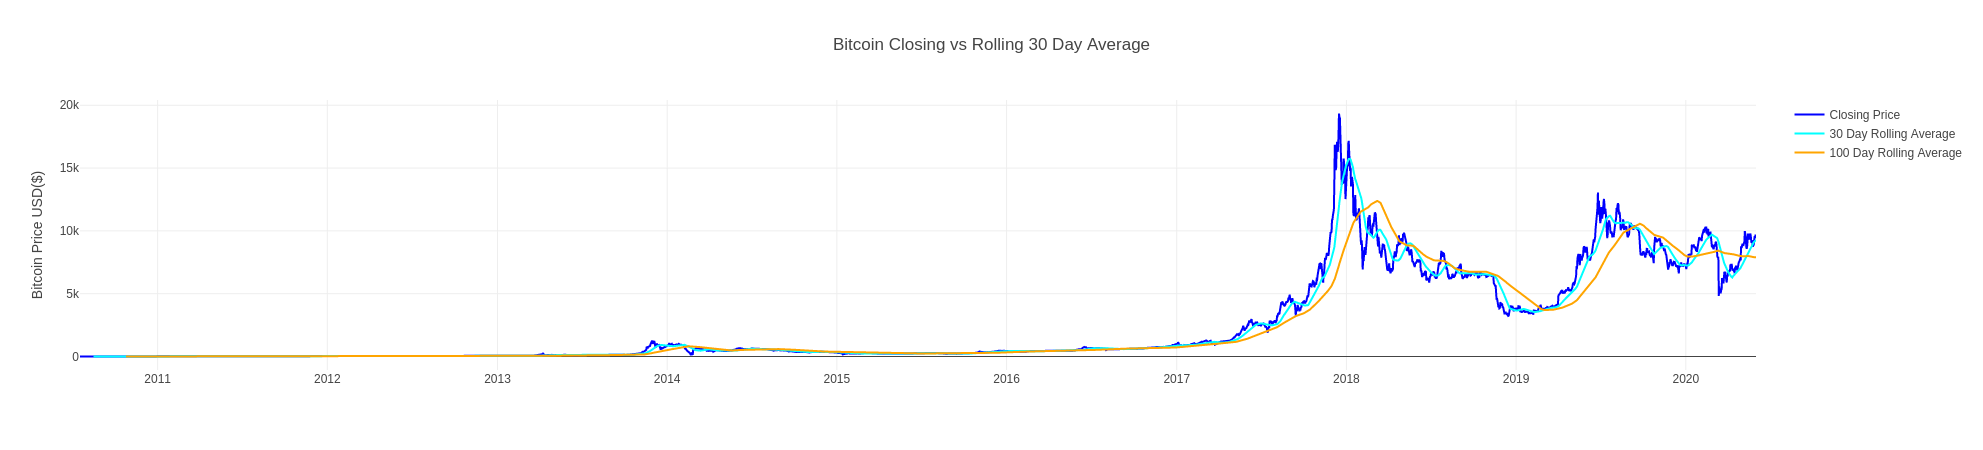

In [9]:
rolling_30 = dataframe['Close'].rolling(window=30).mean()
rolling_100 = dataframe['Close'].rolling(window=100).mean()

fig = go.Figure()

fig.add_trace(go.Line(x=dataframe.index, y=dataframe.Close, line=dict(color='blue'), name='Closing Price'))
fig.add_trace(go.Line(x=dataframe.index, y=rolling_30, line=dict(color='aqua'), name='30 Day Rolling Average'))
fig.add_trace(go.Line(x=dataframe.index, y=rolling_100, line=dict(color='orange'), name='100 Day Rolling Average'))

fig.update_layout(title='Bitcoin Closing vs Rolling 30 Day Average', yaxis_title='Bitcoin Price USD($)', template='none')

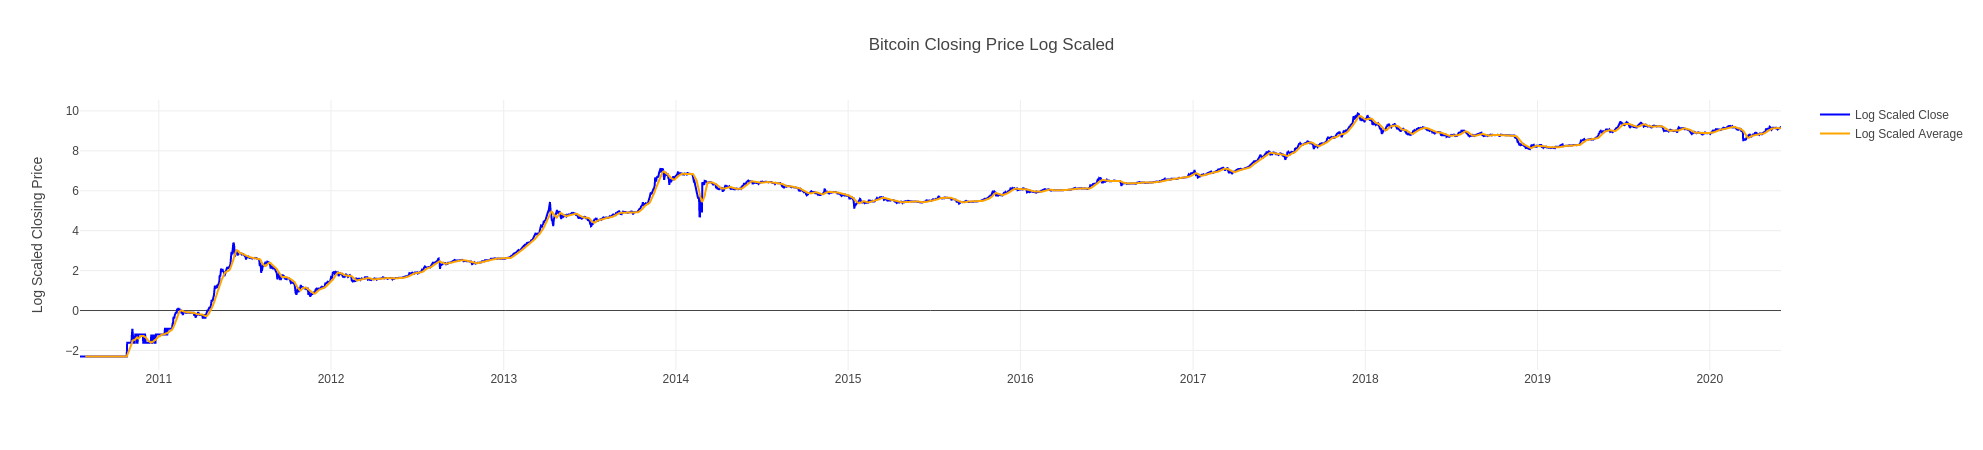

In [10]:
dataframe_logScale = np.log(dataframe['Close'])
moving_average = dataframe_logScale.rolling(window=12).mean()

fig = go.Figure()

fig.add_trace(go.Line(x=dataframe.index, y=dataframe_logScale, line=dict(color='blue'), name='Log Scaled Close'))
fig.add_trace(go.Line(x=dataframe.index, y=moving_average, line=dict(color='orange'), name='Log Scaled Average'))

fig.update_layout(title='Bitcoin Closing Price Log Scaled', yaxis_title='Log Scaled Closing Price', template='none')

In [11]:
dataframe_logScale_less_moving_average = dataframe_logScale - moving_average
dataframe_logScale_less_moving_average.dropna(inplace=True)

Consider typical time series data, which only changes according to the time. In order to forecast for time series data, there are different models which are popular for analysis.

* Auto Regressive
* Moving Average
* ARIMA

ARIMA model is the combination of Auto Regressive, Integration and Moving Average.  

We have to verify the stationarity inorder to forecast the data. We do so utilizing the test_stationarity() function to look at Rolling Mean and Rolling STD and the results fo Dicky Fuller Test.

In [12]:
# Need to run different types of transformations on dataframe and then test for stationarity
# Once we have stationary data then we can run decomposition_components()

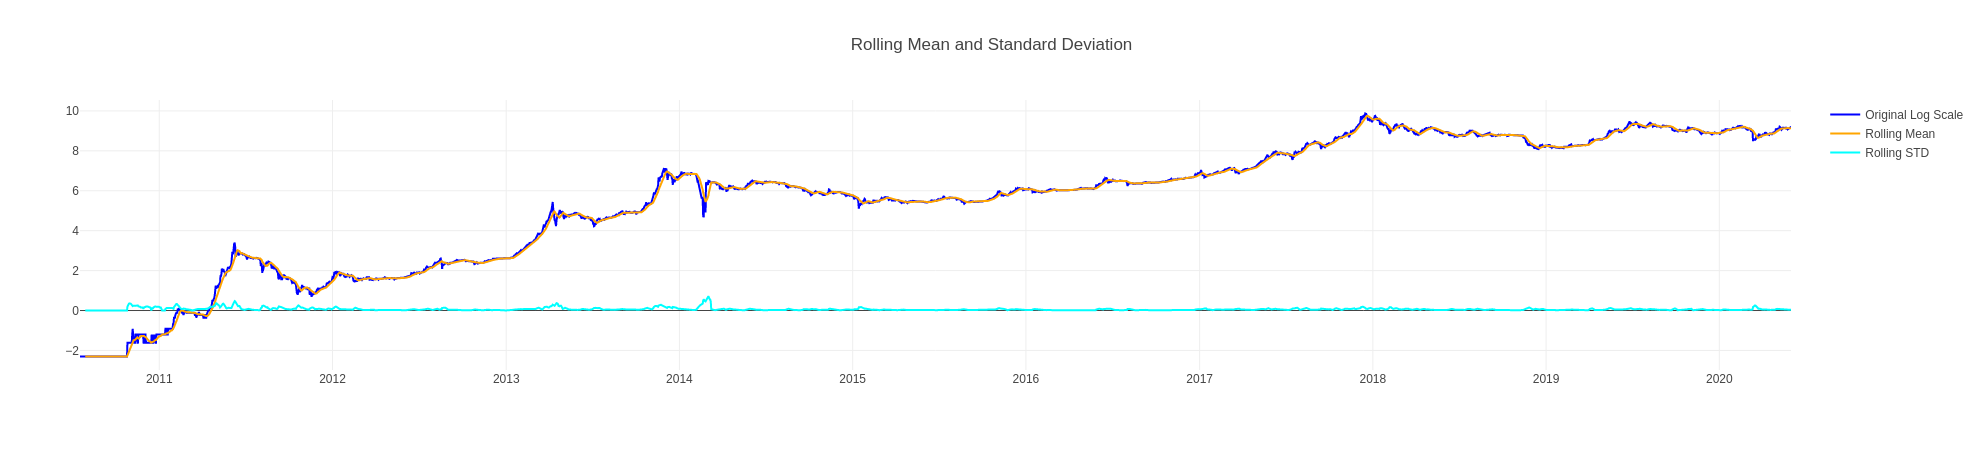

Results of Dickey-Fuller Test:
Test Statistic                   -2.589510
p-value                           0.095185
#Lags Used                        6.000000
Number of Observations Used    3599.000000
Critical Value (1%)              -3.432168
Critical Value (5%)              -2.862343
Critical Value (10%)             -2.567198
dtype: float64


In [13]:
test_stationarity(dataframe_logScale)

/home/bobbyhuck/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




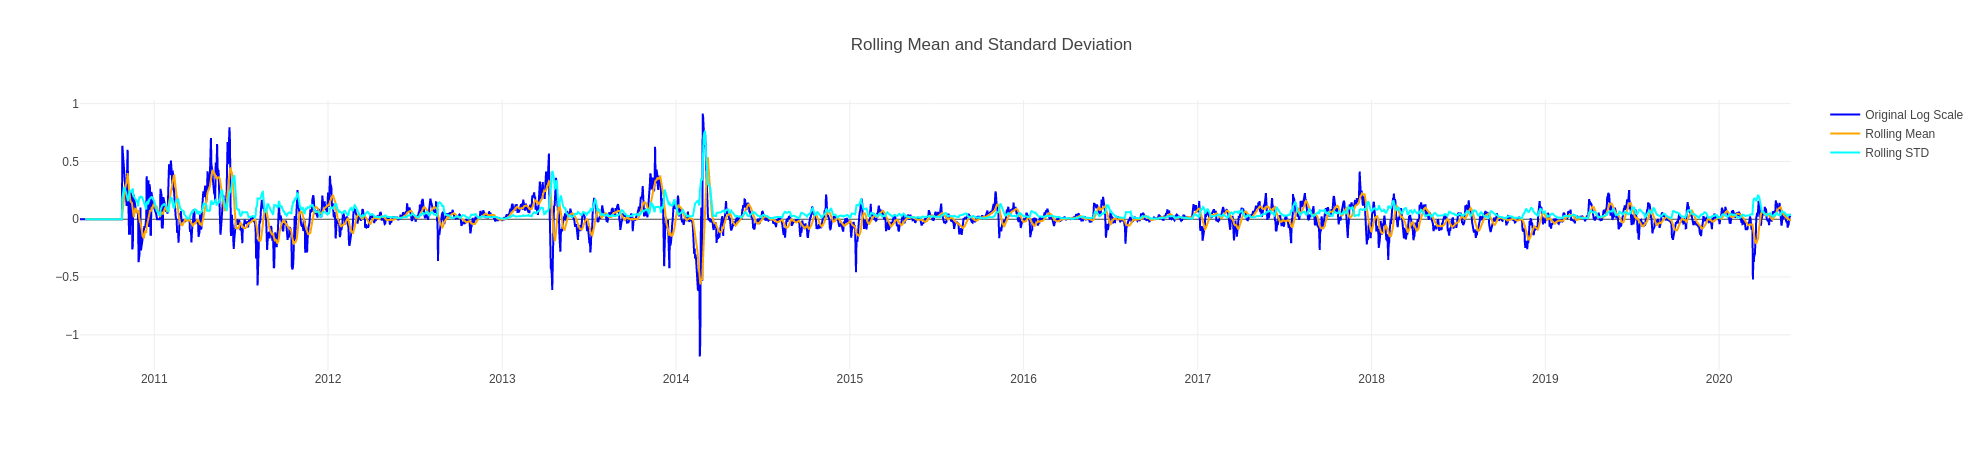

Results of Dickey-Fuller Test:
Test Statistic                -1.216707e+01
p-value                        1.449091e-22
#Lags Used                     1.100000e+01
Number of Observations Used    3.583000e+03
Critical Value (1%)           -3.432176e+00
Critical Value (5%)           -2.862347e+00
Critical Value (10%)          -2.567200e+00
dtype: float64


In [14]:
test_stationarity(dataframe_logScale_less_moving_average)

It’s better to have the p-value smaller than 0.05 in order to reject the null hypothesis and consider data as stationary.

    Wikipedia

    In statistical hypothesis testing, the p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct.

a) if Test Statistic < Critical Value: --> Reject the null hypothesis  
                                        
b) if Test Statistic > Critical Value: --> Fail to reject the null hypothesis    

In our example we can understand that my Test Statistic = -1.455906 is greated than Critical Value (5%) = -2.876479.  
The data is not stationary.

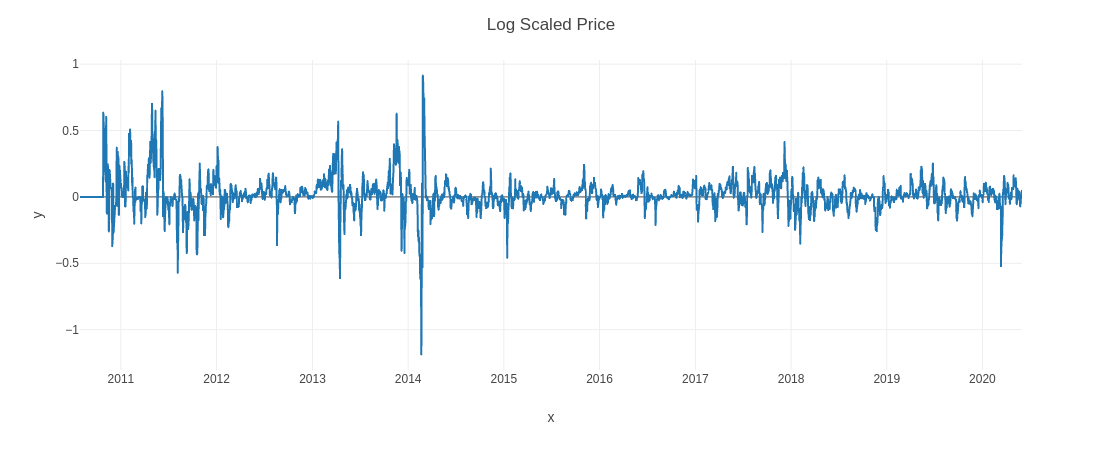

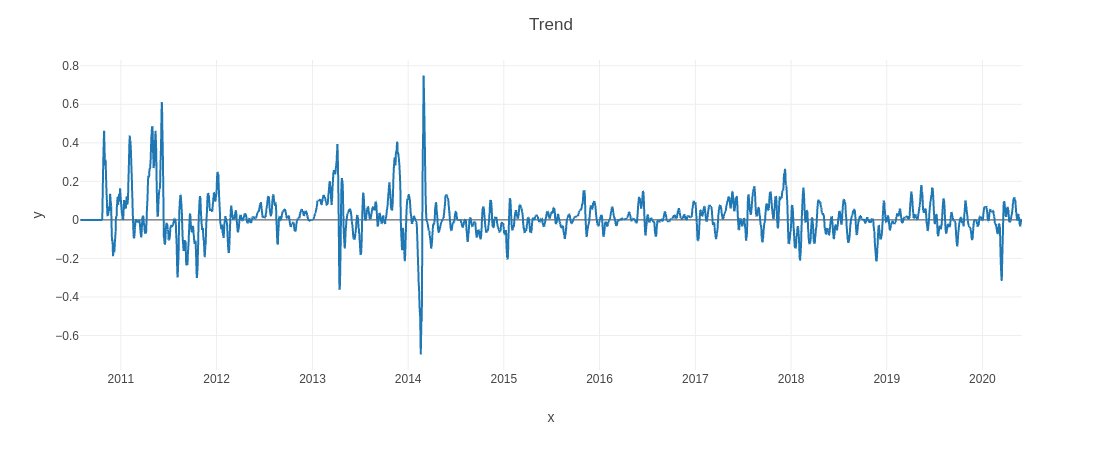

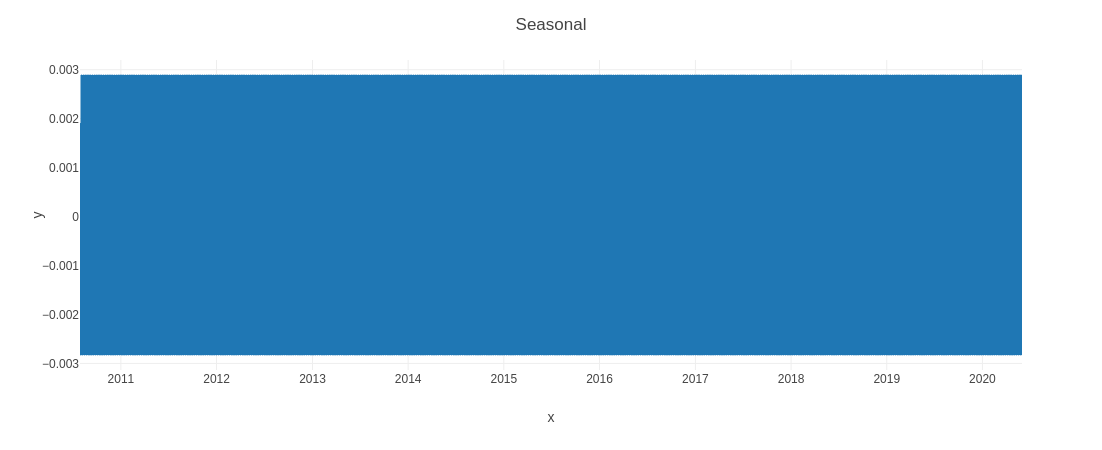

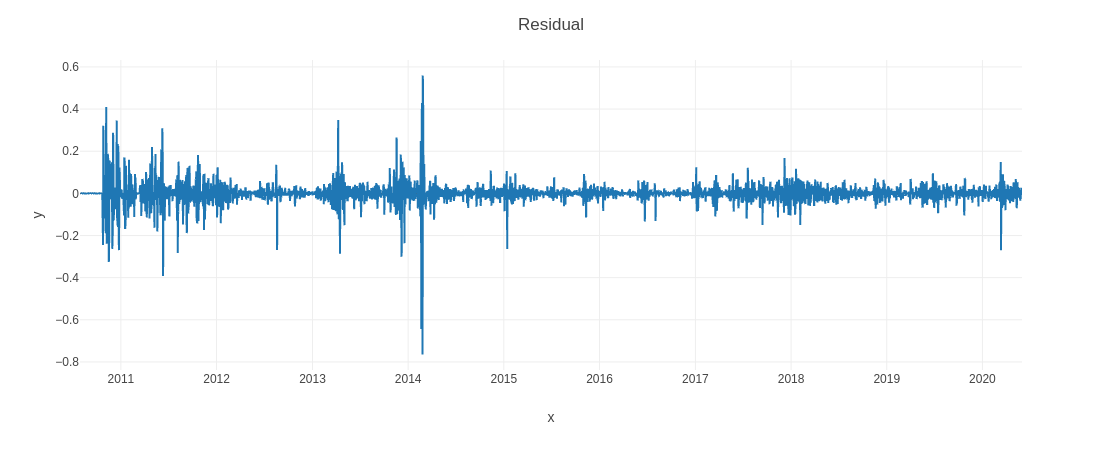

In [20]:
decomposition_components(dataframe_logScale_less_moving_average)

The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

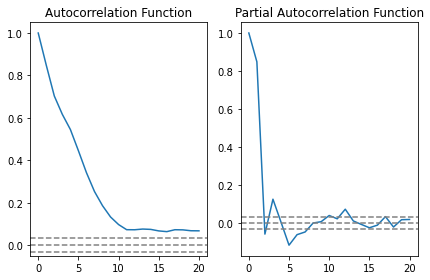

In [17]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

lag_acf = acf(dataframe_logScale_less_moving_average, nlags=20, fft=False)
lag_pacf = pacf(dataframe_logScale_less_moving_average, nlags=20, method='ols')

# Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(dataframe_logScale_less_moving_average)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(dataframe_logScale_less_moving_average)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96 / np.sqrt(len(dataframe_logScale_less_moving_average)), linestyle='--', color='gray')
plt.axhline(y=1.96 / np.sqrt(len(dataframe_logScale_less_moving_average)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [ ]:
# What do the acf & pacf results tell us???

# Data Processing

In [37]:
dataframe = pd.DataFrame(data['Close'])
dataframe.shape

(3606, 1)

In [38]:
X, y = timestep_creator(dataframe)
print(X.shape, y.shape)

(3546, 60) (3546,)


# Baseline Model

In [24]:
dr_mean = DummyRegressor(strategy='mean')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

dr_mean.fit(X_train, y_train)

y_predict_dummy_mean = dr_mean.predict(X_test)

In [25]:
len(y_predict_dummy_mean) # why does it give me 716 values...seems rather arbitrary

710

In [26]:
dates = np.array(dataframe.index)
predicted_dates = np.array(pd.date_range(dataframe.index[-1], periods=128))
dates = np.concatenate((dates, predicted_dates), axis=0)
dates = np.delete(dates, 1277)
dates = pd.DataFrame(dates)

In [27]:
predicted_dates = pd.DataFrame(predicted_dates)
predicted_dates = predicted_dates.drop(0)

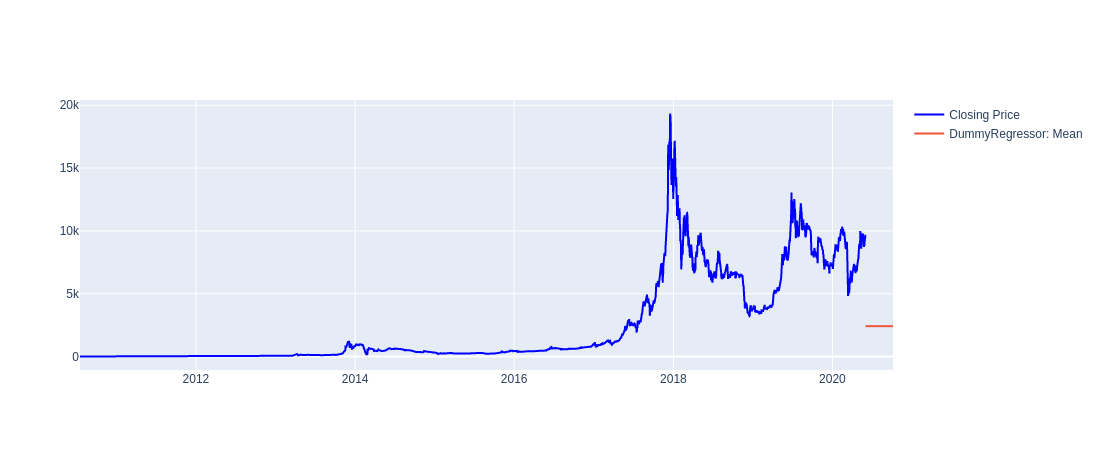

In [29]:
fig = go.Figure()

fig.add_trace(go.Line(x=dates[0], y=dataframe.Close, line=dict(color='blue'), name='Closing Price'))
fig.add_trace(go.Line(x=predicted_dates[0], y=y_predict_dummy_mean, name='DummyRegressor: Mean'))

# ARIMA

# Regularized Regression

In [30]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lr.fit(X_train, y_train)

y_predict_lr = lr.predict(X_test)

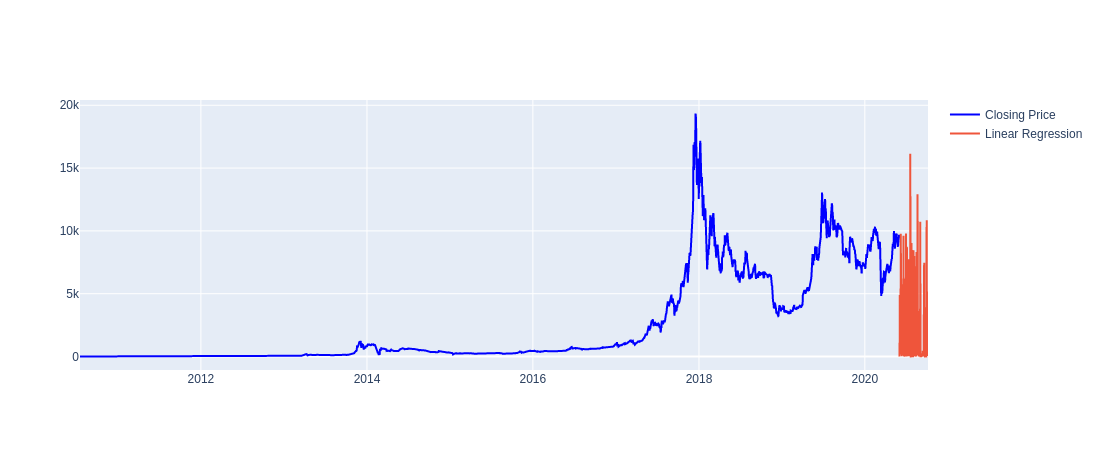

In [32]:
fig = go.Figure()

fig.add_trace(go.Line(x=dates[0], y=dataframe.Close, line=dict(color='blue'), name='Closing Price'))
fig.add_trace(go.Line(x=predicted_dates[0], y=y_predict_lr, name='Linear Regression'))

In [33]:
mse = mean_squared_error(y_test, y_predict_lr)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 45795.7153817998
Root Mean Squared Error: 213.9993350031719


# Regularized Regression

In [ ]:
# is it worth adding this???

# Logistic Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold

# is it worth adding this???

# Decision Tree

# Random Forest

In [39]:
# I'd rather implement one version of the Random Forest and then try and get a transformer and Fast Fourier implemented
rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

ValueError: Unknown label type: 'continuous'

# Random Forest Boosted

# LSTM

In [ ]:
# fig = px.line(time_outside_nat, x='date', y='Avg Time Away', title='Change in Time Outside Home')
# fig.update_xaxes(title_text='Date', nticks=16)
# fig.update_yaxes(title_text='Time Outside Home')
# fig.update_layout(plot_bgcolor='white')
# fig.show()

data_demo = data.loc['10-01-2017':'04-01-2019', :]#[(data.index > '01-01-2017') & (data.index < '01-01-2019')]

fig = px.scatter(data_demo, x=data_demo.index, y=data_demo.Close, title='Scatter Plot of Closing Price', template='none')
fig.update_yaxes(title_text='Closing Price USD ($)')
fig.update_traces(marker=dict(size=3))
fig.show()

# Fast Fourier

# Transformer